### TITANIC - Predictions (EDA Analysis)

- Predicting the probabilty of death of a passenger in Titanic using the DIE Titanic data on Netflix.

In [1]:
## IMPORT SETTINGS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
%matplotlib inline
sns.set()
import  warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Null data check

data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are few null entries in features - 'Age', 'Cabin', 'Embarked'

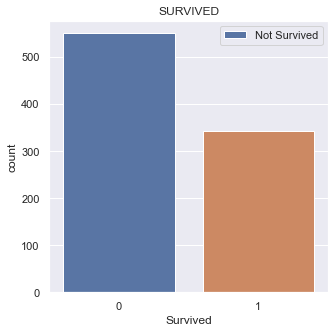

In [5]:
# Passengers who Survived vs passengers who didn't
plt.figure(figsize=(5,5))
sns.countplot(data['Survived'])
plt.legend(labels=['Not Survived','Survived'])
plt.title('SURVIVED')
plt.show()

Evidently, More people died than survived the disaster.
Next, we will analyse the data to see who survived the disaster based on Sex, Class and Age.

**Categorical Feature** : Sex, Embarked

**Ordinanal Feature**: Class

**Continuous Feature**: Age

### Analysing Features

#### 1. SEX

In [6]:
survived_sex = data.groupby(['Sex','Survived'])['Survived'].count()
survived_sex_df = survived_sex.to_frame()
survived_sex_df

Survived
Sex    Survived          
female 0               81
       1              233
male   0              468
       1              109

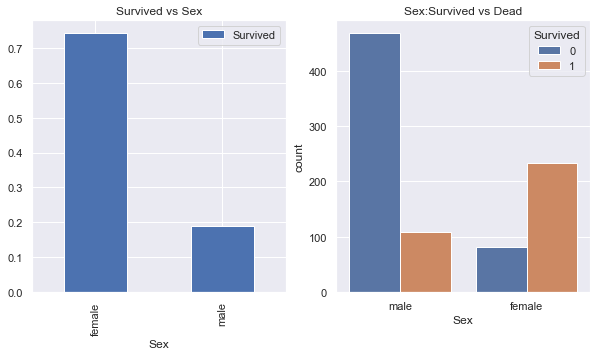

In [7]:
f,ax=plt.subplots(1,2,figsize=(10,5))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

More women survived the disaster than men, inspite the fact that there were more men onboard than women.

#### 2. AGE (Conitnuous Feature)

In [8]:
#Average Age of passengers
print("Average age of passengers:", data['Age'].mean(), 'years', "\nOldest and Youngest passenger's age :",data['Age'].max(),'&', data['Age'].min(),'years respectively' )

Average age of passengers: 29.69911764705882 years 
Oldest and Youngest passenger's age : 80.0 & 0.42 years respectively


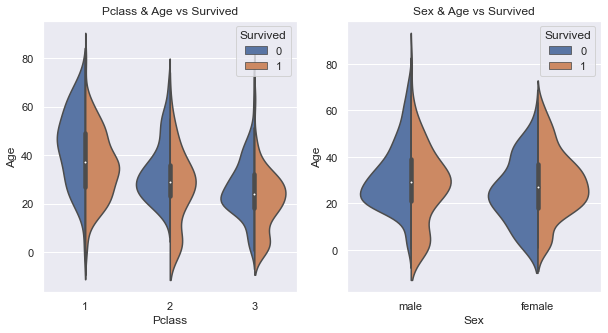

In [9]:
f,ax = plt.subplots(1,2, figsize=(10,5))
sns.violinplot("Pclass","Age", hue="Survived", data=data, split = True, ax=ax[0])
ax[0].set_title("Pclass & Age vs Survived")
sns.violinplot("Sex","Age", hue="Survived", data=data, split=True, ax=ax[1])
ax[1].set_title("Sex & Age vs Survived")
plt.show()

**Observations:**
- There were more children in Classes 2 & 3 than 1 who have seemed to survived despite their class.
- More women survived than men in their 20-50s.
- Survival chances for men decreased with the increase in age.

In [10]:
import re

In [11]:
## Separating the initials from their names to assign appropriate age to passengers with Null ages. 
## Using .split()

prefix_list = []
for i in data['Name']:
    a = i.split(', ')[1].split('.'[0])[0]
    #print(a)
    prefix_list.append(a)
data['Prefix'] = prefix_list 

In [12]:
data['Prefix'] = data['Prefix'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'])

In [13]:
prefix = data.groupby(['Sex','Prefix']).count()
prefix = prefix['Age']
prefix_df = prefix.to_frame()
prefix_df = prefix_df.reset_index(level=['Prefix'])
prefix_df = prefix_df.pivot(columns='Prefix').fillna(0)
prefix_df

Age                                        
Prefix Master   Miss     Mr    Mrs Other the Countess
Sex                                                  
female    0.0  150.0    1.0  109.0   0.0          1.0
male     36.0    0.0  408.0    0.0   9.0          0.0

In [14]:
# Average age by Prefix
data.groupby('Prefix')['Age'].mean()

Prefix
Master           4.574167
Miss            21.860000
Mr              32.739609
Mrs             36.009174
Other           45.888889
the Countess    33.000000
Name: Age, dtype: float64

In [15]:
#Replacing missing ages with Average ages on basis of the prefix.

data.loc[(data.Age.isnull())&(data.Prefix=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Prefix=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Prefix=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Prefix=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Prefix=='Other'),'Age']=46

In [16]:
data.Age.isnull().any() #So no null values left finally 

False

#### 3.  Pclass (Ordinal Feature)

In [17]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='Blues')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Text(0.5, 1.0, 'survived vs not survived in every class')

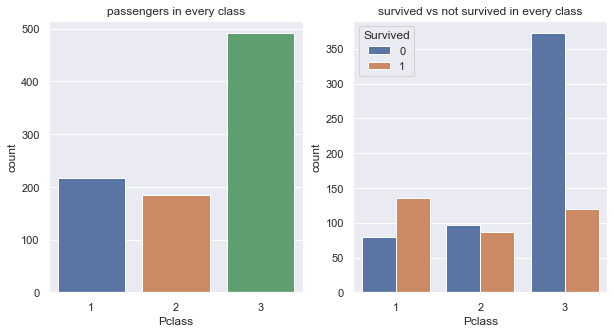

In [18]:
f,ax = plt.subplots(1,2, figsize=(10,5))
sns.countplot('Pclass', data=data, ax=ax[0])
ax[0].set_title('passengers in every class')

sns.countplot('Pclass',hue='Survived', data=data, ax=ax[1])
ax[1].set_title('survived vs not survived in every class')

Even though there were more passengers in 3rd Class but most them did not survive the disaster.

In [19]:
pd.crosstab([data.Sex,data.Survived],data.Pclass , margins=True).style.background_gradient(cmap='Blues')

<AxesSubplot:xlabel='Age', ylabel='Count'>

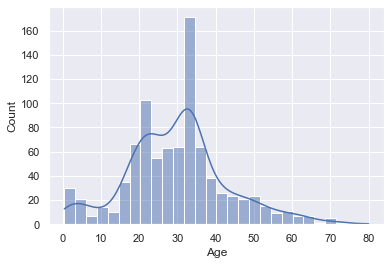

In [20]:
# AGE Distribution Histplot
sns.histplot(data,x='Age',kde=True)

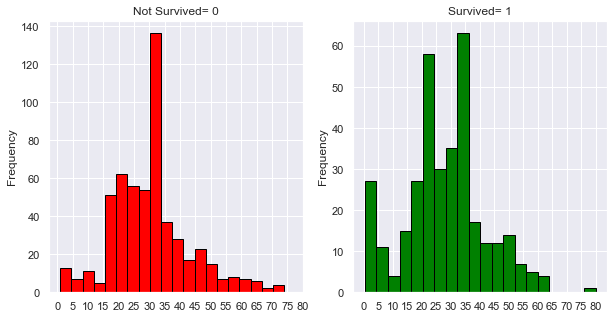

In [21]:
# AGE Distribution - Survived VS not Survived
f,ax=plt.subplots(1,2,figsize=(10,5))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Not Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

#### 4. Embarkement  (Categorical Feature)

In [22]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

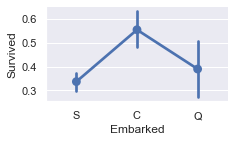

In [23]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf()
fig.set_size_inches(3,1.5)
plt.show()

Survival chances from C port is highest aroung 55%.

### HeatMap - Correlations

In [24]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [25]:
df = data.drop(columns=['PassengerId','Name', 'Parch','Ticket', 'Cabin','Prefix'])

In [26]:
#df.head()

<AxesSubplot:>

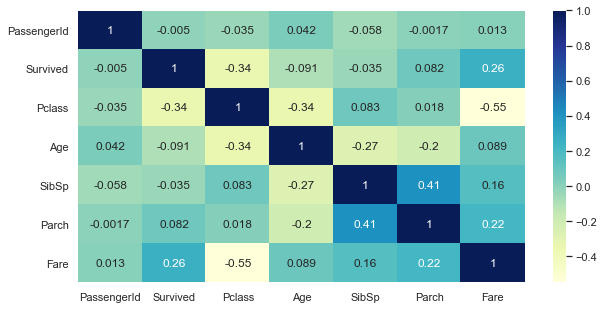

In [27]:
#Calculating Correlation
corr = data.corr()

#Heat map
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, cmap = "YlGnBu")

## Observations overall:
**Sex:** The chance of survival for women is high as compared to men.

**Pclass:**There is a visible trend that being a **1st class passenger** gives you better chances of survival. The survival rate for **Pclass3 is very low**. For **women**, the chance of survival from **Pclass1** is almost 1 and is high too for those from **Pclass2**.   **Money Wins!!!**. 

**Age:** Children less than 5-10 years do have a high chance of survival. Passengers between age group 15 to 35 died a lot.

**Embarked:** This is a very interesting feature. **The chances of survival at C looks to be better than even though the majority of Pclass1 passengers got up at S.** Passengers at Q were all from **Pclass3**. 


_____________________________________________________________________________________


## Feature Engineering & Data Cleaning
- removing redundant features
- Cleaning and refining data
1. Converting continuous age to age groups
2. Converting Sex into numerical value eg Male:0, female:1
3. Converting Embarkments into numerical value eg: S:0, C:1, Q:2
4. Salutation/Prefix into numeric eg: Mr:0, Miss:1 etc.

#### 1. AGE

In [28]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [29]:
data['Age_band'] = 0

for n in data.index:
    if data['Age'][n] <=16:
        data['Age_band'][n]=0
    elif (data['Age'][n]>16)&(data['Age'][n]<=32):
        data['Age_band'][n]=1
    elif (data['Age'][n]>32)&(data['Age'][n]<=48):
        data['Age_band'][n]=2
    elif (data['Age'][n]>48)&(data['Age'][n]<=64):
        data['Age_band'][n]=3
    else:
        data['Age_band'][n]=4

#### SEX, EMBARKED, PREFIX

In [30]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Prefix'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

#### FARE & FAMILY SIZE

In [31]:
## FARE
data['Fare_range'] = 0

for n in data.index:
    if data['Fare'][n] <=7.91:
        data['Fare_range'][n]=0
    elif (data['Fare'][n]>7.91)&(data['Fare'][n]<=14.54):
        data['Fare_range'][n]=1
    elif (data['Fare'][n]>14.54)&(data['Fare'][n]<=31):
        data['Fare_range'][n]=2
    elif (data['Fare'][n]>31)&(data['Fare'][n]<=513):
        data['Fare_range'][n]=3
    else:
        data['Fare_range'][n]=4

In [32]:
## FAMILY SIZE

data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1#Alone

#### Dropping unnecessary features
- 'Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'

In [33]:
data.drop(['Name','Age','Ticket','Fare','Cabin','PassengerId'],axis=1,inplace=True)

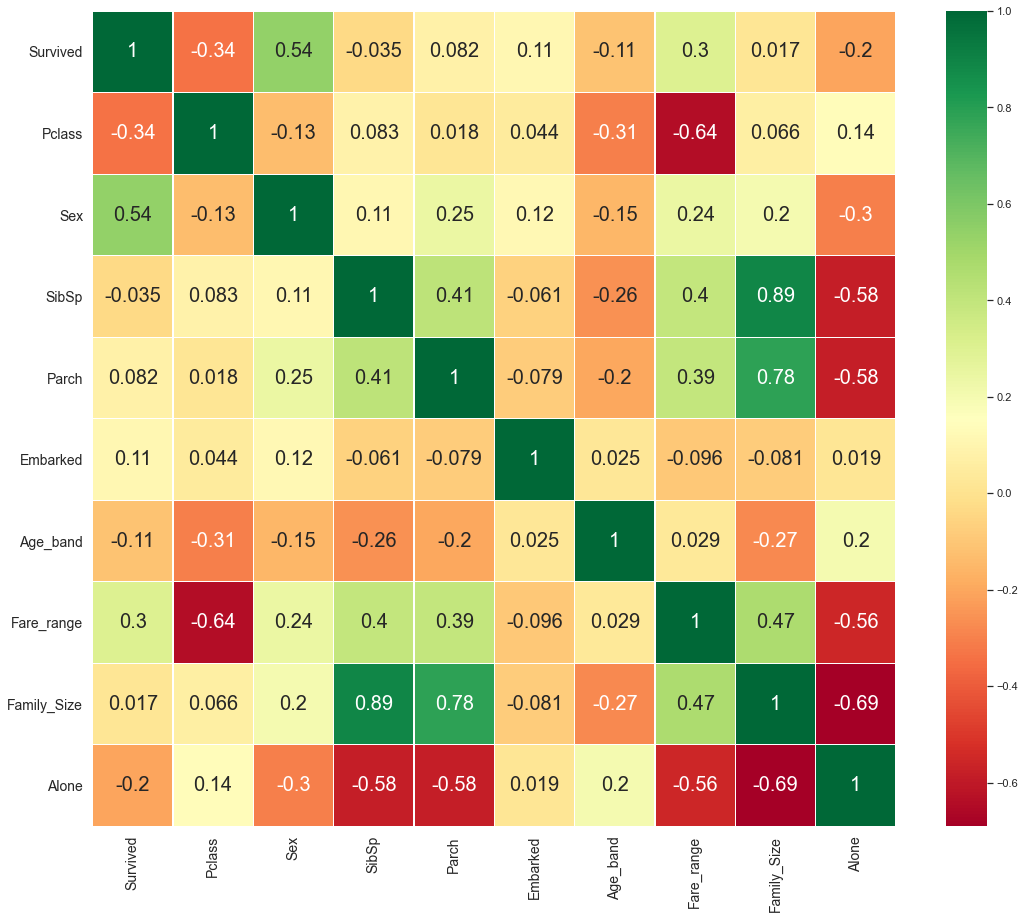

In [35]:
# HEATMAP Correlation
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn', linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## Modelling

In [37]:
## Import Libraries
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

#### Splitting Data into Train and test sets

In [40]:
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Prefix,Age_band,Fare_range,Family_Size,Alone
0,0,3,0,1,0,0.0,0,1,0,1,0
1,1,1,1,1,0,1.0,1,2,3,1,0
2,1,3,1,0,0,0.0,2,1,1,0,1
3,1,1,1,1,0,0.0,1,2,3,1,0
4,0,3,0,0,0,0.0,0,2,1,0,1


In [41]:
X = data.drop(columns=['Survived'])
y = data['Survived']

In [45]:
print (len(X),len(y))

891 891


In [46]:
# Split into TRAIN and TEST

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state=42)

In [47]:
print (len(X_train),len(y_train),len(X_test),len(y_test))

623 623 268 268


1. Linear Regression
2. Decision Trees
3. Random Forest
4. Artificial Neural Networks ANN
https://towardsdatascience.com/6-predictive-models-models-every-beginner-data-scientist-should-master-7a37ec8da76d

## 1. LINEAR REGRESSION